In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/asp-/Desktop/all folders/prices.csv')

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df.shape

(851264, 7)

In [5]:
df1= df[df['symbol']=='YHOO']
df1 = df1.close.values.astype('float32')
df1 = df1.reshape(1762, 1)
df1.shape


(1762, 1)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.plot(df1)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df1= scaler.fit_transform(df1)

<Figure size 640x480 with 1 Axes>

In [7]:
df1.shape

(1762, 1)

In [8]:
df1

array([[0.14559111],
       [0.14874032],
       [0.14728683],
       ...,
       [0.66957366],
       [0.66739345],
       [0.66812015]], dtype=float32)

In [9]:
# test and train split
train_size=int(len(df1)*0.80)
test_size=len(df1)-train_size
train, test = df1[0:train_size,:], df1[train_size:len(df1),:]
print(len(train), len(test))

1409 353


In [11]:
import numpy as np
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step=100
X_train, Y_train= create_dataset(train,time_step)
X_test, Y_test= create_dataset(test,time_step)

In [13]:
print(X_train.shape), print(Y_train.shape)

(1308, 100)
(1308,)


(None, None)

In [14]:
print(X_test.shape), print(Y_test.shape)

(252, 100)
(252,)


(None, None)

In [15]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [16]:
print(X_train.shape), print(Y_train.shape)

(1308, 100, 1)
(1308,)


(None, None)

In [17]:
print(X_test.shape), print(Y_test.shape)

(252, 100, 1)
(252,)


(None, None)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import time

In [19]:
#LSTM stack model
lmodel=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

start = time.time()
model.compile(loss='mean_squared_error',optimizer='adam')
print ('compilation time : ', time.time() - start)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
compilation time :  0.03124260902404785


In [20]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=128,verbose=0.05)

Train on 1308 samples, validate on 252 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

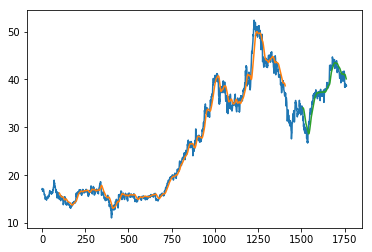

In [25]:
import numpy as np
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] =test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
len(test)

353

In [27]:
len(train)

1409

In [29]:
x_input=test[253:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.6986434459686279,
 0.7311046719551086,
 0.77156001329422,
 0.7650193572044373,
 0.7606589198112488,
 0.7657461762428284,
 0.7705911993980408,
 0.7734981179237366,
 0.7613857388496399,
 0.7633236050605774,
 0.746608555316925,
 0.7495154738426208,
 0.7553295493125916,
 0.7550871968269348,
 0.7628392577171326,
 0.7669573426246643,
 0.7713178992271423,
 0.7797965407371521,
 0.8144379258155823,
 0.8057170510292053,
 0.8059592843055725,
 0.7710755467414856,
 0.7841569781303406,
 0.773982584476471,
 0.7841569781303406,
 0.7969961762428284,
 0.7892441153526306,
 0.7776163220405579,
 0.7679263949394226,
 0.8006297945976257,
 0.8008721470832825,
 0.7681686282157898,
 0.7558140158653259,
 0.7819767594337463,
 0.7897287011146545,
 0.7625969052314758,
 0.7754359841346741,
 0.7761628031730652,
 0.7773740887641907,
 0.7902131676673889,
 0.7894864678382874,
 0.7783430218696594,
 0.7953004240989685,
 0.765261709690094,
 0.7575097680091858,
 0.7395833134651184,
 0.7352228760719299,
 0.743701636791229

In [41]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)
        
        
        

0 day input [0.77156001 0.76501936 0.76065892 0.76574618 0.7705912  0.77349812
 0.76138574 0.76332361 0.74660856 0.74951547 0.75532955 0.7550872
 0.76283926 0.76695734 0.7713179  0.77979654 0.81443793 0.80571705
 0.80595928 0.77107555 0.78415698 0.77398258 0.78415698 0.79699618
 0.78924412 0.77761632 0.76792639 0.80062979 0.80087215 0.76816863
 0.75581402 0.78197676 0.7897287  0.76259691 0.77543598 0.7761628
 0.77737409 0.79021317 0.78948647 0.77834302 0.79530042 0.76526171
 0.75750977 0.73958331 0.73522288 0.74370164 0.74103683 0.76647288
 0.75799423 0.75290698 0.76308137 0.76211244 0.75072676 0.7456395
 0.74345928 0.73788756 0.73255819 0.71681201 0.70591086 0.70712209
 0.72577518 0.72843993 0.72965115 0.70421511 0.71051353 0.6833818
 0.70542634 0.72407949 0.73546511 0.72916663 0.7272287  0.72480619
 0.72359496 0.72141474 0.73546511 0.73909885 0.72504848 0.69137603
 0.70203489 0.70518416 0.69961244 0.7129361  0.73449618 0.74297482
 0.73183137 0.7359497  0.72238374 0.66182172 0.6666666

7 day input [[0.6927513]]
8 day input [0.74660856 0.74951547 0.75532955 0.7550872  0.76283926 0.76695734
 0.7713179  0.77979654 0.81443793 0.80571705 0.80595928 0.77107555
 0.78415698 0.77398258 0.78415698 0.79699618 0.78924412 0.77761632
 0.76792639 0.80062979 0.80087215 0.76816863 0.75581402 0.78197676
 0.7897287  0.76259691 0.77543598 0.7761628  0.77737409 0.79021317
 0.78948647 0.77834302 0.79530042 0.76526171 0.75750977 0.73958331
 0.73522288 0.74370164 0.74103683 0.76647288 0.75799423 0.75290698
 0.76308137 0.76211244 0.75072676 0.7456395  0.74345928 0.73788756
 0.73255819 0.71681201 0.70591086 0.70712209 0.72577518 0.72843993
 0.72965115 0.70421511 0.71051353 0.6833818  0.70542634 0.72407949
 0.73546511 0.72916663 0.7272287  0.72480619 0.72359496 0.72141474
 0.73546511 0.73909885 0.72504848 0.69137603 0.70203489 0.70518416
 0.69961244 0.7129361  0.73449618 0.74297482 0.73183137 0.7359497
 0.72238374 0.66182172 0.66666669 0.66206396 0.67999035 0.67974812
 0.66400194 0.66787791 0.

19 day input [[0.7013092]]
20 day input [0.78415698 0.77398258 0.78415698 0.79699618 0.78924412 0.77761632
 0.76792639 0.80062979 0.80087215 0.76816863 0.75581402 0.78197676
 0.7897287  0.76259691 0.77543598 0.7761628  0.77737409 0.79021317
 0.78948647 0.77834302 0.79530042 0.76526171 0.75750977 0.73958331
 0.73522288 0.74370164 0.74103683 0.76647288 0.75799423 0.75290698
 0.76308137 0.76211244 0.75072676 0.7456395  0.74345928 0.73788756
 0.73255819 0.71681201 0.70591086 0.70712209 0.72577518 0.72843993
 0.72965115 0.70421511 0.71051353 0.6833818  0.70542634 0.72407949
 0.73546511 0.72916663 0.7272287  0.72480619 0.72359496 0.72141474
 0.73546511 0.73909885 0.72504848 0.69137603 0.70203489 0.70518416
 0.69961244 0.7129361  0.73449618 0.74297482 0.73183137 0.7359497
 0.72238374 0.66182172 0.66666669 0.66206396 0.67999035 0.67974812
 0.66400194 0.66787791 0.67417634 0.66957366 0.66739345 0.66812015
 0.69703424 0.6945346  0.69273508 0.69160187 0.69103312 0.69090599
 0.69110322 0.6915251  

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt


In [44]:
len(df1)

1762

In [37]:
df3=df1.tolist()
df3.extend(lst_output)

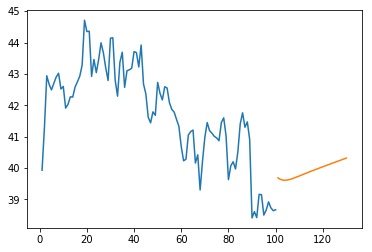

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1662:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

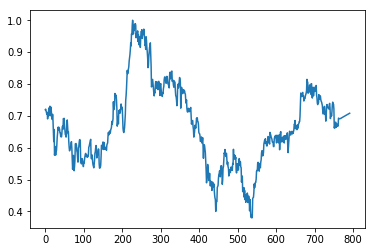

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])